# Ward

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append("../")
import spopt

In [3]:
import numpy as np
import libpysal
import geopandas as gpd

In [4]:
from spopt.region import WardSpatial

##### Airbnb Spots Clustering in Chicago

Cluster 77 communities into 8 regions using Ward linkage with a spatial connectivity constraint.

In [40]:
pth = libpysal.examples.get_path('airbnb_Chicago 2015.shp')

chicago = gpd.read_file(pth)

chicago

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,75584290.0209,48665.1305392,74,NaN,NaN,NaN,NaN,NaN,0,...,1.0,36.8,4.3,8.7,34381,16,1233,326,19093,"POLYGON ((-87.69646 41.70714, -87.69644 41.706..."
73,MORGAN PARK,91877340.6988,46396.419362,75,85.500000,96.666667,97.000000,67.933333,1.000000,5,...,0.8,40.3,10.8,15.0,27149,30,3998,912,22544,"POLYGON ((-87.64215 41.68508, -87.64249 41.685..."
74,OHARE,371835607.687,173625.98466,76,83.500000,100.000000,83.000000,38.500000,2.500000,2,...,3.6,30.3,10.9,7.1,25828,24,3423,1011,12756,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,EDGEWATER,48449990.8397,31004.8309456,77,94.429530,85.925676,94.540323,77.199510,1.582353,170,...,4.1,23.8,9.7,9.2,33385,19,4559,1409,56521,"POLYGON ((-87.65456 41.99817, -87.65456 41.998..."


<AxesSubplot:>

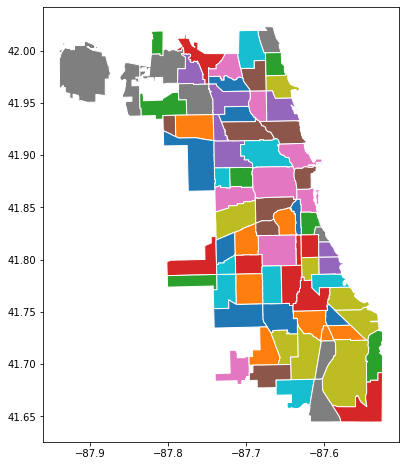

In [41]:
chicago.plot(column='community', categorical=True, figsize=(12,8), edgecolor='w')

In [37]:
attrs_name = ['num_spots']
w = libpysal.weights.Queen.from_dataframe(chicago)
n_clusters = 8

In [38]:
model = WardSpatial(chicago, w, attrs_name, n_clusters)
model.solve()
chicago['ward_new'] = model.labels_

<AxesSubplot:>

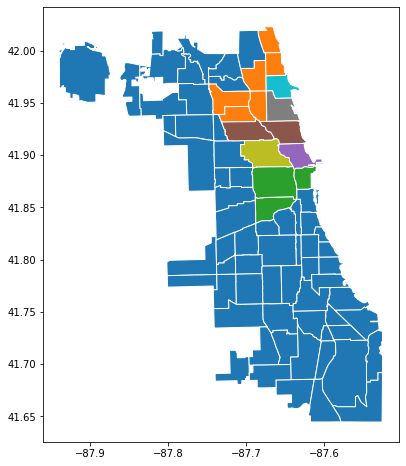

In [39]:
chicago.plot(column='ward_new', categorical=True, figsize=(12,8), edgecolor='w')